In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

jpm = pd.read_csv('JPM.csv')
jpm.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,11.416667,13.000000,11.041667,12.500000,3.034126,12146400
1,1985-02-01,12.416667,14.333333,12.208333,13.125000,3.185833,13131900
2,1985-03-01,13.125000,13.416667,12.375000,12.500000,3.034126,16036200
3,1985-04-01,12.541667,13.625000,12.333333,12.625000,3.113972,10235100
4,1985-05-01,12.791667,14.500000,12.708333,13.791667,3.401731,20562900


In [10]:
def linear_weight_moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period, len(signal)):
        buffer.append(
            (signal[i - period : i] * (np.arange(period) + 1)).sum()
            / (np.arange(period) + 1).sum()
        )
    return buffer

signal = np.copy(jpm.Close.values)

lw_ma_7 = linear_weight_moving_average(signal, 7)
lw_ma_14 = linear_weight_moving_average(signal, 14)
lw_ma_21 = linear_weight_moving_average(signal, 21)
lw_ma_100 = linear_weight_moving_average(signal, 100)



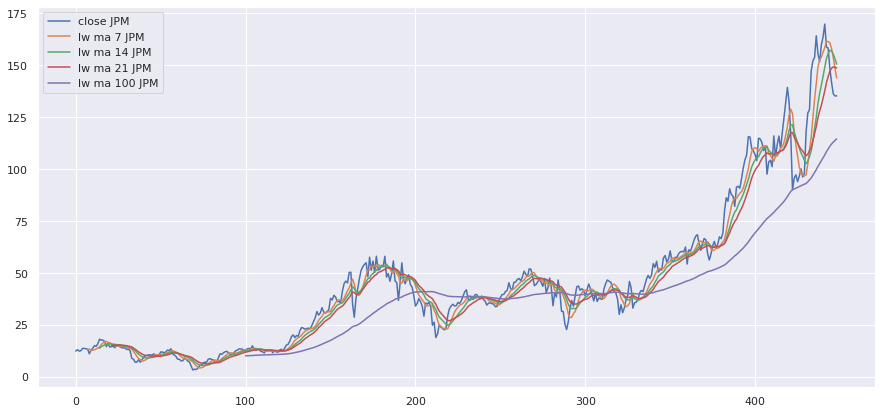

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(jpm.Close)), jpm.Close, label ='close JPM')
plt.plot(np.arange(len(jpm.Close)), lw_ma_7, label = 'lw ma 7 JPM')
plt.plot(np.arange(len(jpm.Close)), lw_ma_14, label = 'lw ma 14 JPM')
plt.plot(np.arange(len(jpm.Close)), lw_ma_21, label = 'lw ma 21 JPM')
plt.plot(np.arange(len(jpm.Close)), lw_ma_100, label = 'lw ma 100 JPM')
plt.legend()
plt.show()